<a href="https://colab.research.google.com/github/kuikala/DataSamples/blob/main/priceacq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google vs Facebook Relative Performance and Acquisitions, 2013-2019

We want to take a look at the relative performance of Google and Facebook stock and the impact, if any,  of acquisitions on the overall performance.  For more details, please visit [the project homepage](https://github.com/kuikala/DataSamples).



In [2]:
import pandas as pd
import numpy as np

## Relative Performance 

### We start by looking at a graph of the relative performance on a percentage basis from January 1, 2013 to January 1, 2019

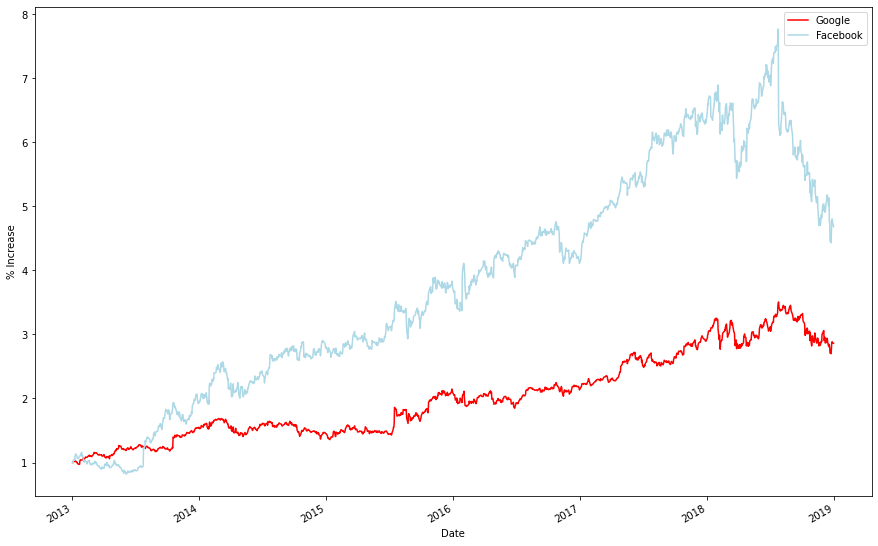

In [3]:
# load price data and setup columns

prices = pd.read_csv('https://raw.githubusercontent.com/kuikala/DataSamples/main/pricedata.csv')

prices['date'] =  pd.to_datetime(prices['date'])

prices.set_index('date')

# calculate relative performance
goog_init_price = prices.goog_price[0]
fb_init_price = prices.fb_price[0]

prices['goog_rel'] = prices['goog_price']/goog_init_price
prices['fb_rel'] = prices['fb_price']/fb_init_price

#plot the relative performance
relperf = prices.plot(x='date', y=['goog_rel','fb_rel'], color=['Red','LightBlue'],xlabel='Date', ylabel='% Increase', figsize=(15,10))
relperf.legend(['Google', 'Facebook'])

### Facebook initially performs much better, but falters at the end, let's look at performance post 2016


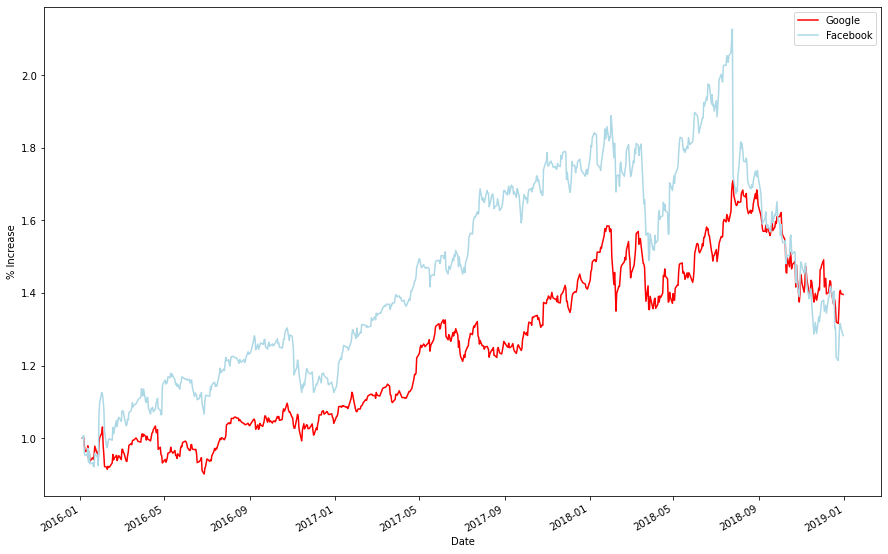

In [4]:
# filter the set
prices_2016 = prices[(prices['date'] > '2016-01-01')].reset_index()
prices_2016.set_index('date')

# calculate relative performance on new date range
goog_init_price = prices_2016.goog_price[0]
fb_init_price = prices_2016.fb_price[0]

prices_2016['goog_rel'] = prices_2016['goog_price']/goog_init_price
prices_2016['fb_rel'] = prices_2016['fb_price']/fb_init_price

relperf_2016 = prices_2016.plot(x='date', y=['goog_rel','fb_rel'], color=['Red','LightBlue'],xlabel='Date', ylabel='% Increase', figsize=(15,10))
relperf_2016.legend(['Google', 'Facebook'])

### Performance is rougly the same, let's see if acquisitions could have been a driver for the Google's performance improvements. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6146e166d0>],
      dtype=object)

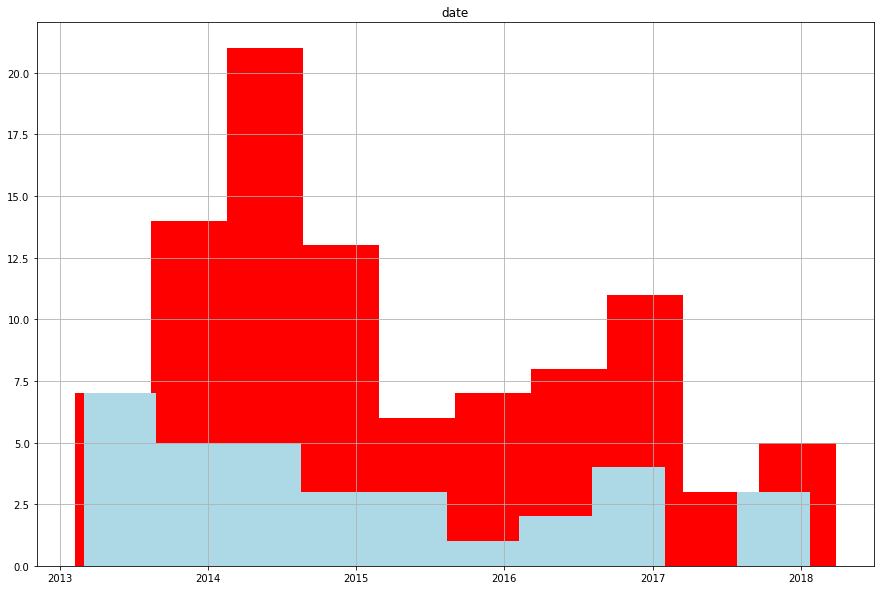

In [5]:
# load acquisition data and setup columns

acquistions = pd.read_csv('https://raw.githubusercontent.com/kuikala/DataSamples/main/acquisitions.csv')

acquistions['date'] =  pd.to_datetime(acquistions['date'])
acquistions.set_index('date')

# break down acquisitions by company to plot as a histogram
goog_acquistions = acquistions[acquistions.acquirer=='Google']
fb_acquistions = acquistions[acquistions.acquirer=='Facebook']

histogram = goog_acquistions.hist(column='date', color='Red', figsize=(15,10))
fb_acquistions.hist(column='date', color='LightBlue', ax=histogram)

### Starting in the second half of 2013, Google had more acquistions. Let's see if the acquistions affected any price movements for both companies. 

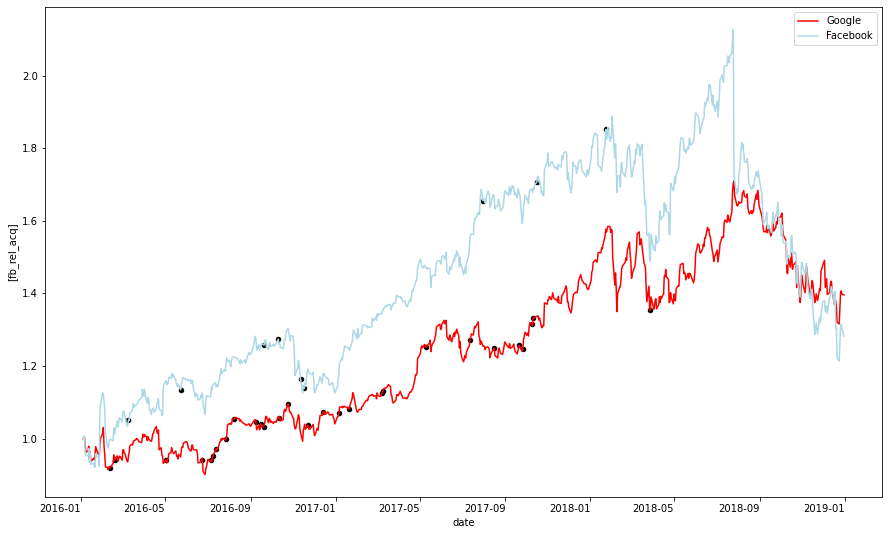

In [6]:
# filter acquistions post 2016
acquistions_2016 = acquistions[(acquistions['date'] > '2016-01-01')].reset_index()

# combine the data
price_acquistions_2016 = pd.merge(prices_2016, acquistions_2016, how='left', on='date')

# create scatter plot data for prices and relative prices
price_acquistions_2016['goog_price_acq'] = np.where((price_acquistions_2016['acquirer']=='Google') & pd.notna(price_acquistions_2016['acq_id']), price_acquistions_2016['goog_price'], np.nan)
price_acquistions_2016['fb_price_acq'] = np.where((price_acquistions_2016['acquirer']=='Facebook') & pd.notna(price_acquistions_2016['acq_id']), price_acquistions_2016['fb_price'], np.nan)

price_acquistions_2016['goog_rel_acq'] = np.where((price_acquistions_2016['acquirer']=='Google') & pd.notna(price_acquistions_2016['acq_id']), price_acquistions_2016['goog_rel'], np.nan)
price_acquistions_2016['fb_rel_acq'] = np.where((price_acquistions_2016['acquirer']=='Facebook') & pd.notna(price_acquistions_2016['acq_id']), price_acquistions_2016['fb_rel'], np.nan)

relperf_acquisitions_2016 = price_acquistions_2016.plot(x='date', y=['goog_rel'], color='Red' , figsize=(15,10))
price_acquistions_2016.plot.scatter(x='date', y=['goog_rel_acq'], color='Black', ax=relperf_acquisitions_2016)

price_acquistions_2016.plot(x="date", y=['fb_rel'], color='LightBlue', ax=relperf_acquisitions_2016)
price_acquistions_2016.plot.scatter(x='date', y=['fb_rel_acq'], color='Black', ax=relperf_acquisitions_2016)

relperf_acquisitions_2016.legend(['Google', 'Facebook'])

### While no concrete conclusions can be made from the data, Google's stock price tends to go up 12-15 months after sets of acquisitions, while Facebook with fewer acquisitions does not have the same outcome. 


## Appendix -- Plot of comparative price with acquistion


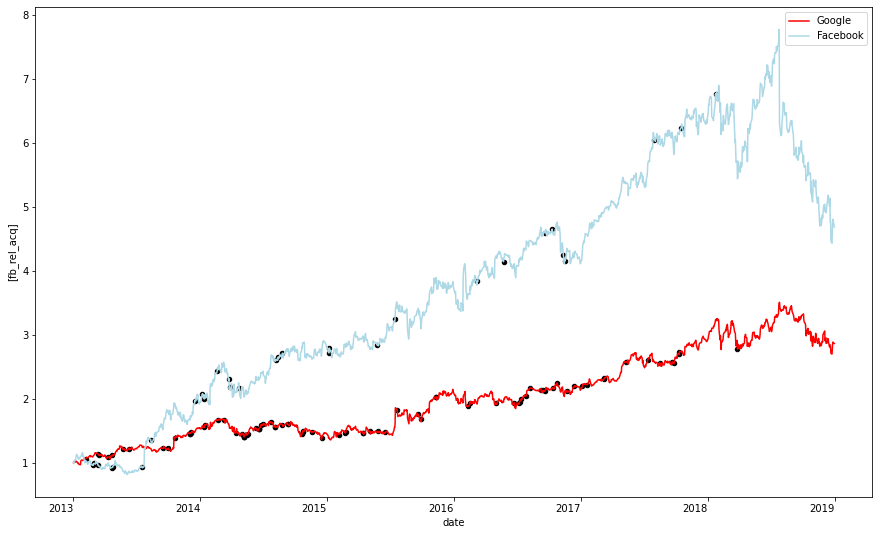

In [7]:
# combine the data
price_acquistions = pd.merge(prices, acquistions, how='left')

# create scatter plot data for prices and relative prices
price_acquistions['goog_price_acq'] = np.where((price_acquistions['acquirer']=='Google') & pd.notna(price_acquistions['acq_id']), price_acquistions['goog_price'], np.nan)
price_acquistions['fb_price_acq'] = np.where((price_acquistions['acquirer']=='Facebook') & pd.notna(price_acquistions['acq_id']), price_acquistions['fb_price'], np.nan)

price_acquistions['goog_rel_acq'] = np.where((price_acquistions['acquirer']=='Google') & pd.notna(price_acquistions['acq_id']), price_acquistions['goog_rel'], np.nan)
price_acquistions['fb_rel_acq'] = np.where((price_acquistions['acquirer']=='Facebook') & pd.notna(price_acquistions['acq_id']), price_acquistions['fb_rel'], np.nan)

relperf_acquisitions = price_acquistions.plot(x='date', y=['goog_rel'], color='Red', figsize=(15,10))
price_acquistions.plot.scatter(x='date', y=['goog_rel_acq'], color='Black', ax=relperf_acquisitions)

price_acquistions.plot(x='date', y=['fb_rel'], color='LightBlue', ax=relperf_acquisitions)
price_acquistions.plot.scatter(x='date', y=['fb_rel_acq'], color='Black', ax=relperf_acquisitions)

relperf_acquisitions.legend(['Google', 'Facebook'])
